### Experimental Parameters

In [11]:
import json

# Create experimental parameters and write to JSON file

proposal_rates = [0.1, 0.2]
n_trials = 2

params = {'Block proposal rate parameter': 0,
 'Block size (txs)': 50,
 'Duration (sec)': 1200,
 'Fork choice rule': 'longest-chain',
 'Network model': 'Decker-Wattenhorf',
 'Number of adversaries': 1,
 'Number of nodes': 100,
 'Probability of error in transaction confirmation': 0.1,
 'Transaction dataset': 'poisson'}
d = {}
for i in range(0, len(proposal_rates)):
    params['Block proposal rate parameter'] = proposal_rates[i]
    d[f'longest-chain-{i}'] = params


In [12]:
# Run experiments
import os

os.chdir('..')

import metrics

throughputs = {}
main_chain_arrival_latencies = {}
finalization_latencies = {}

n_trials = 3

for i in range(0, len(proposal_rates)):
    rate = proposal_rates[i]
    d['setting-name'] = f'longest-chain-{i}'
    with open('results/longest_chain.json', 'w+') as outfile:
        json.dump(d, outfile)
    throughputs[rate] = []
    main_chain_arrival_latencies[rate] = []
    finalization_latencies[rate] = []
    for trial in range(0, n_trials):
        os.system('python3 main.py -f results/longest_chain.json')
        throughput = metrics.compute_throughput()
        avg_main_chain_arrival_latency, avg_finalization_latency = metrics.compute_latency()
        throughputs[rate].append(throughput)
        main_chain_arrival_latencies[rate].append(avg_main_chain_arrival_latency)
        finalization_latencies[rate].append(avg_finalization_latency)
        
os.chdir('results/')
print('Throughputs:\n', throughputs)
print('Main Chain Arrival Latencies:\n', main_chain_arrival_latencies)
print('Finalization Latencies:\n', finalization_latencies)

Throughputs:
 {0.1: [1, 1, 1], 0.2: [1, 1, 1]}
Main Chain Arrival Latencies:
 {0.1: [7.153675112246762, 5.9356173530483725, 7.239792030527921], 0.2: [5.799649973790275, 6.022783361593085, 6.585639165385546]}
Finalization Latencies:
 {0.1: [7.020347889720807, 7.718547636469848, 7.628439772865356], 0.2: [6.490063109880431, 8.611015222984278, 7.525891933082255]}


In [5]:
avg_main_chain_latencies = {}
for rate in main_chain_arrival_latencies:
    avg_main_chain_latencies[rate] = sum(main_chain_arrival_latencies[rate])/len(main_chain_arrival_latencies[rate])

print("Average Main Chain Arrival Latency:", avg_main_chain_latencies)
avg_finalization_latencies = {}
for rate in finalization_latencies:
    avg_finalization_latencies[rate] = sum(finalization_latencies[rate])/len(finalization_latencies[rate])
    
print("Average Finalization Latency:", avg_finalization_latencies)


Average Main Chain Arrival Latency: {0.1: 6.406234569964688, 0.2: 6.610065510487897}
Average Finalization Latency: {0.1: 7.465204112034923, 0.2: 7.8999723282031455}


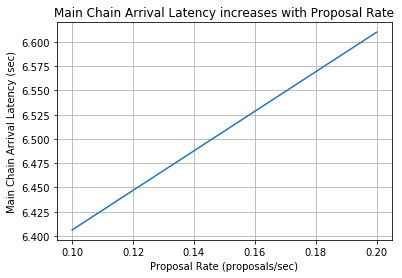

In [8]:
import matplotlib.pylab as plt
import pandas

stats_df = pd.read_csv('../logs/stats.csv')
print(stats_df.loc[stats_df['Finalization depth'] == some_value])

x = avg_main_chain_latencies.keys()
y1 = avg_main_chain_latencies.values()
y2 = avg_finalization_latencies.values()

plt.xlabel('Proposal Rate (proposals/sec)')
plt.ylabel('Main Chain Arrival Latency (sec)')
plt.title('Main Chain Arrival Latency increases with Proposal Rate')
plt.grid(True)

plt.plot(x, y1)
plt.show()

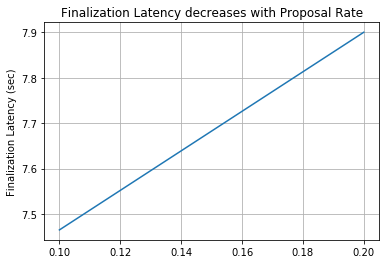

In [7]:
plt.title('Finalization Latency decreases with Proposal Rate')
plt.ylabel('Finalization Latency (sec)')
plt.grid(True)

plt.plot(x, y2)
plt.show()